In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_annotate
import utils_train as ut
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
data_all = utils_annotate.load_json('src_data/2024-02-14_sciencedirect_machine+learning+interatomic+potential_120.json')
data_all = [d for d in data_all if d['abstract'] != None]
print(f"Number of entries: {len(data_all)}")
print(len(os.listdir('individual_ner')))
# os.listdir('individual_ner')

Number of entries: 102
58


In [3]:
index = 58
name = data_all[index]['prism:doi'].replace('/', '')
print(name)
word_list, categories = utils_annotate.annotate(data_all[index]['abstract'],
 ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION', 'VALUE', 'APPL'], name)

10.1016j.cpc.2021.108132
Interatomic potential (i.e. force-field) plays a vital role in atomistic simulation of materials. Empirical potentials like the embedded atom method (EAM) and its variant angular-dependent potential (ADP) have proven successful in many metals. In the past few years, machine learning has become a compelling approach for modeling interatomic interactions. Powered by big data and efficient optimizers, machine learning interatomic potentials can generally approximate to the accuracy of the first-principles calculations based on the quantum mechanics theory. In this works, we successfully developed a route to express EAM and ADP within machine learning framework in highly-vectorizable form and further incorporated several physical constraints into the training. As it is proved in this work, the performances of empirical potentials can be significantly boosted with few training data. For energy and force predictions, machine tuned EAM and ADP, can be almost as accura

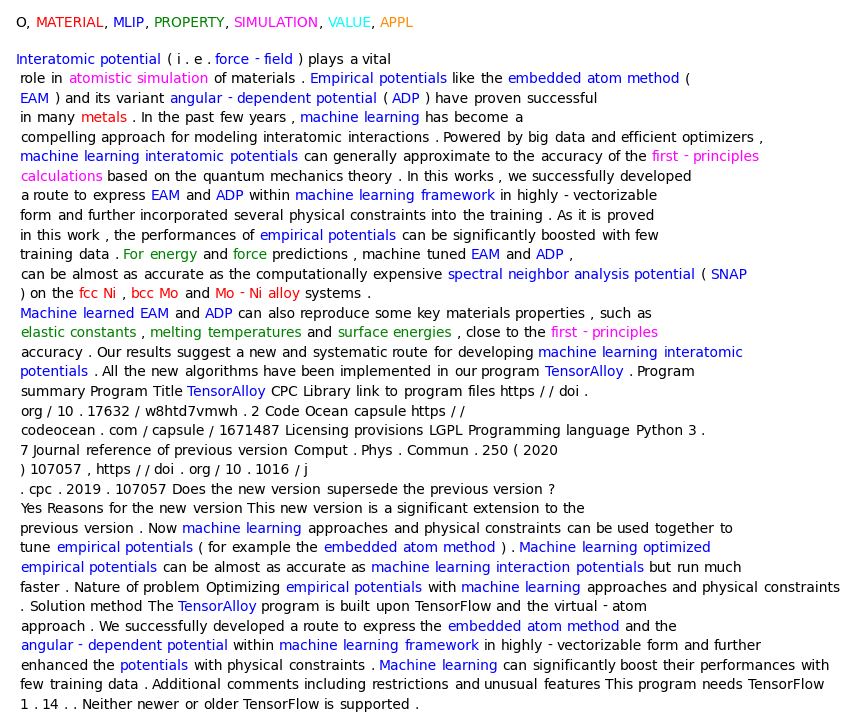

In [4]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in word_list]
markers = [{"color": colors[i]} for i in categories]
j = 0
for i in range(len(word_list)):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [ ]:
data = utils_annotate.combine_records('individual_ner')
SEED = 1421
ut.seed_everything(SEED)
utils_annotate.json_train_test('train_test_data', data, 3, shuffle=True)